In [ ]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
# Cargar el modelo entrenado
model = YOLO('yolov8_100epochs.pt')

# Evaluar el modelo en el conjunto de datos de evaluación
results = model.val(data=r'C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\tp-final-cv2\Card-Detection\dataset\dataset.yaml', iou=0.5, conf=0.4)
results

Ultralytics YOLOv8.2.46  Python-3.12.2 torch-2.3.1+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
Model summary (fused): 168 layers, 3015203 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\tp-final-cv2\Card-Detection\dataset\yolov8\val\labels.cache... 690 images, 0 backgrounds, 0 corrupt: 100%|██████████| 690/690 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [05:54<00:00,  8.07s/it]


                   all        690       4271       0.96      0.934      0.964      0.768
                    1O         68         68      0.983      0.897      0.947      0.771
                    1C         97         99      0.966      0.949      0.973      0.789
                    1E         99         99      0.969      0.961      0.981      0.824
                    1B         94         94      0.947      0.951      0.957      0.774
                    2O         95         95      0.967      0.924      0.965      0.767
                    2C        100        100      0.968       0.92      0.956       0.75
                    2E        120        120      0.965      0.924      0.959      0.773
                    2B         82         82      0.965      0.951      0.985      0.781
                    3O         81         81       0.99      0.914      0.968      0.769
                    3C         73         73      0.936      0.918      0.958      0.757
                    3

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000222C9349520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.

In [3]:

# Obtener y imprimir las métricas de evaluación
precision = results.box.mp
recall = results.box.mr
f1 = results.box.f1
map50 = results.box.map50
map50_95 = results.box.map

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1.mean():.4f}")
print(f"mAP@0.5: {map50:.4f}")
print(f"mAP@0.5:0.95: {map50_95:.4f}")

Precision: 0.9601
Recall: 0.9341
F1 Score: 0.9467
mAP@0.5: 0.9639
mAP@0.5:0.95: 0.7677


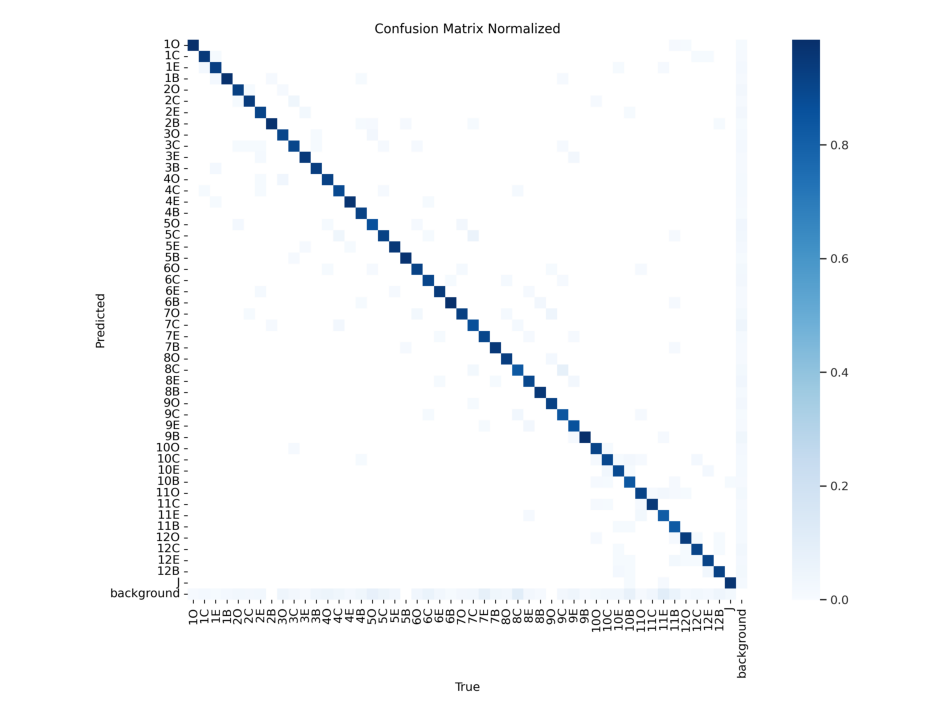

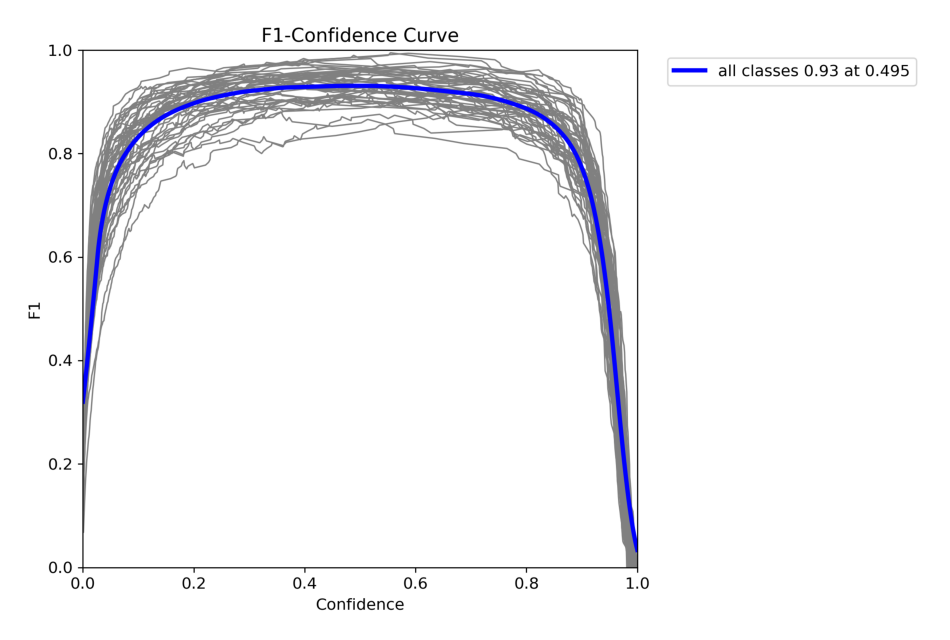

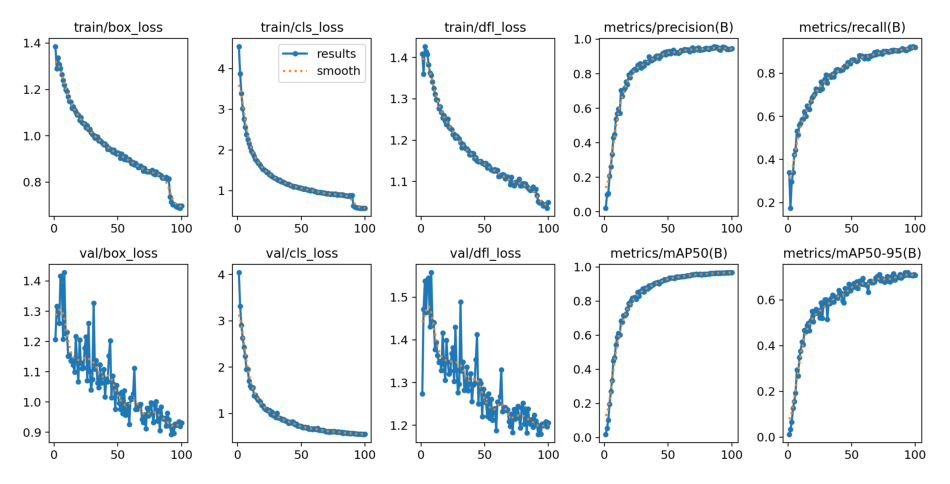

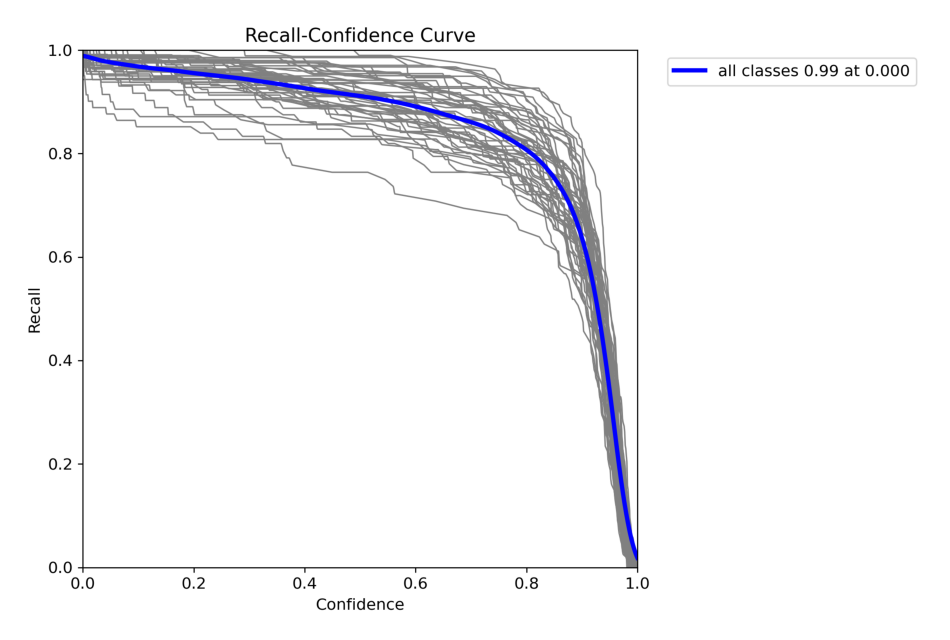

In [10]:
# Cargar una imagen usando OpenCV
image_paths = [r'C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\TruCopilot\metrics\confusion_matrix_normalized.png',
               r'C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\TruCopilot\metrics\F1_curve.png',
               r'C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\TruCopilot\metrics\results.png',
               r'C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\TruCopilot\metrics\R_curve.png']
for img in image_paths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

    plt.figure(figsize=(12,12))
    plt.imshow(image)
    plt.axis('off')  # Ocultar los ejes
    plt.show()


In [11]:
pd.read_csv(r"C:\Users\tomas\OneDrive\Desktop\facultad\5to_cuatrimestre\Vision_por_computadora\TruCopilot\metrics\results.csv")

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.38540,4.54650,1.4088,0.02026,0.33983,0.01782,0.01200,1.20640,4.04180,1.2734,0.000062,0.000062,0.000062
1,2,1.29010,3.87870,1.3601,0.09923,0.17383,0.05327,0.03347,1.31610,3.31890,1.4717,0.000124,0.000124,0.000124
2,3,1.33550,3.39410,1.4268,0.10572,0.29602,0.10146,0.06515,1.29410,2.90670,1.5378,0.000185,0.000185,0.000185
3,4,1.30800,3.01340,1.4145,0.20774,0.33911,0.19500,0.12590,1.26030,2.63320,1.4641,0.000183,0.000183,0.000183
4,5,1.29160,2.75930,1.4075,0.26026,0.42267,0.26960,0.15617,1.41620,2.42680,1.5408,0.000182,0.000182,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.69465,0.56868,1.0409,0.94057,0.92266,0.96684,0.70932,0.92325,0.55376,1.1990,0.000011,0.000011,0.000011
96,97,0.69189,0.56958,1.0428,0.94256,0.91831,0.96669,0.70787,0.92794,0.55451,1.2050,0.000009,0.000009,0.000009
97,98,0.69832,0.57420,1.0449,0.94074,0.92460,0.96715,0.70673,0.93450,0.55478,1.2081,0.000008,0.000008,0.000008
98,99,0.68766,0.56800,1.0355,0.94438,0.92165,0.96773,0.71142,0.91941,0.55080,1.1964,0.000006,0.000006,0.000006
